# Stock Optimization & Demand Forecasting


## Setup

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Education/Business Intelligence/Github Portfolio/sales_2_final.csv'

In [2]:
try:
  sales_df = pd.read_csv(file_path)
  print("Successfully loaded the CSV file.")

  print("\nDataFrame Shape (rows, columns):", sales_df.shape)
  print("\nDataFrame Info:\n", sales_df.info())
  print("\nDataFrame Head:\n", sales_df.head())
  print("\nDataFrame Describe:\n", sales_df.describe())

except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path and try again.")
except Exception as e:
  print(f"An error occurred: {e}")

Successfully loaded the CSV file.

DataFrame Shape (rows, columns): (49289, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49289 entries, 0 to 49288
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             49289 non-null  object 
 1   store_id               49289 non-null  object 
 2   date                   49289 non-null  object 
 3   sales                  49289 non-null  float64
 4   revenue                49289 non-null  float64
 5   stock                  49289 non-null  float64
 6   price                  49289 non-null  float64
 7   promo_type_1           49289 non-null  object 
 8   promo_bin_1            6522 non-null   object 
 9   promo_type_2           49289 non-null  object 
 10  promo_bin_2            0 non-null      float64
 11  promo_discount_2       0 non-null      float64
 12  promo_discount_type_2  0 non-null      float64
dtypes: float64(7), object(6)
m

In [4]:
daily_sales = sales_df.groupby('date')['sales'].sum().reset_index()
daily_sales

,date,sales
0,02/01/17,6074.93
1,03/01/17,5808.25
2,04/01/17,5910.69
3,05/01/17,5106.13


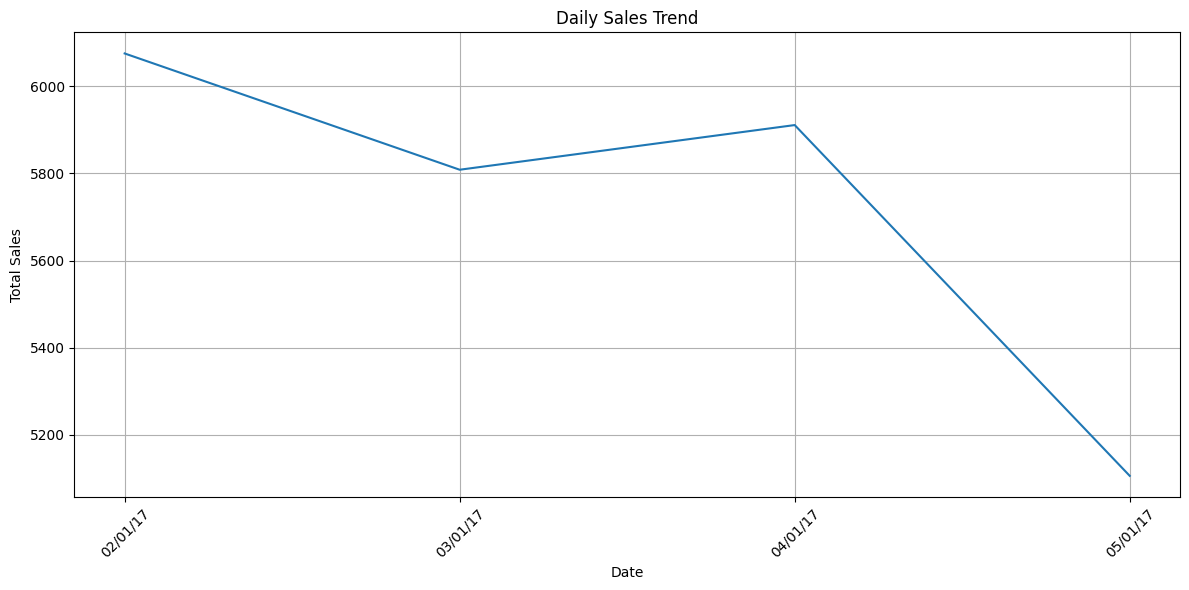

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Train Time Series Forecasting Model (Simple)

<ipython-input-6-752e95e8759a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_sales['ds'] = pd.to_datetime(daily_sales['date'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm0uap9i/fzq4swqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm0uap9i/n6_czc7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96172', 'data', 'fil

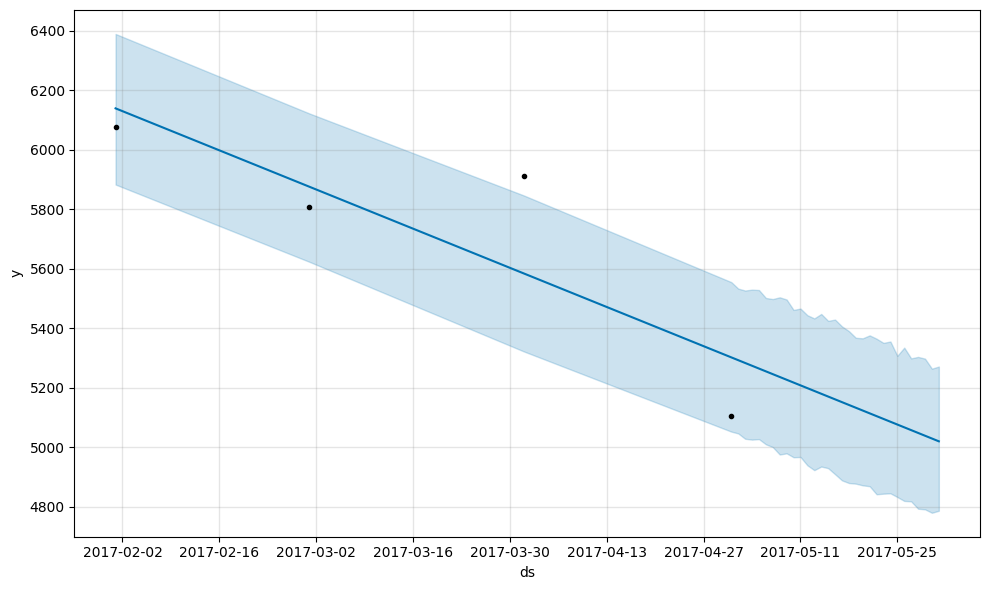

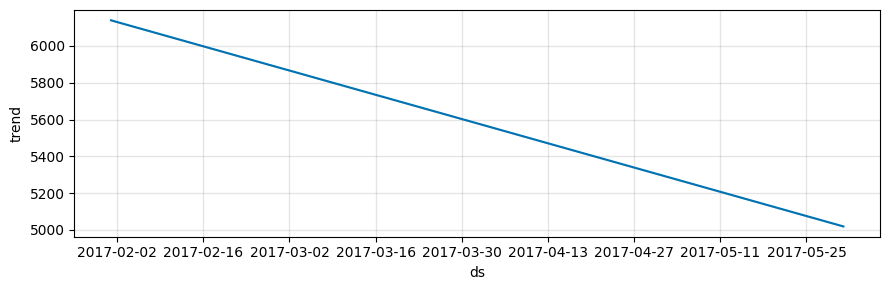

In [6]:
from prophet import Prophet

daily_sales['ds'] = pd.to_datetime(daily_sales['date'])
daily_sales['y'] = daily_sales['sales']
daily_sales = daily_sales[['ds', 'y']]

model = Prophet()
model.fit(daily_sales)

future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future

forecast = model.predict(future)

fig1 = model.plot(forecast)

fig2 = model.plot_components(forecast)

## Print Model

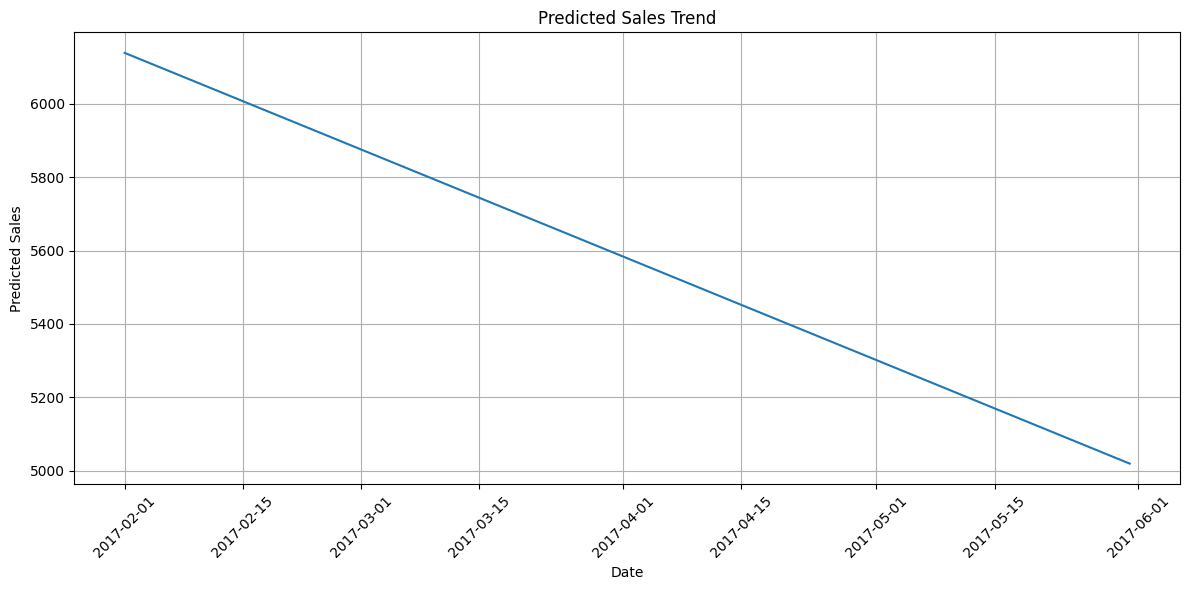

In [9]:
import matplotlib.pyplot as plt

predicted_sales = forecast[['ds', 'yhat']]

plt.figure(figsize=(12, 6))
plt.plot(predicted_sales['ds'], predicted_sales['yhat'])
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales Trend')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
